In [3]:
# Import required lobraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#!git clone https://github.com/mohittomar2008/Big-Data-Mart-Sales-Problem

Cloning into 'Big-Data-Mart-Sales-Problem'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 14 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), done.


In [9]:
#!wget https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv

--2022-03-30 02:37:36--  https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 869537 (849K) [text/plain]
Saving to: ‘bigdatamart_Train.csv’

bigdatamart_Train.c 100%[===================>] 849.16K  --.-KB/s    in 0.03s   

2022-03-30 02:37:37 (27.2 MB/s) - ‘bigdatamart_Train.csv’ saved [869537/869537]



In [64]:
#df= pd.read_csv('bigdatamart_Train.csv')
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')

In [65]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [66]:
df.shape

(8523, 12)

array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>],
       [<AxesSubplot:title={'center':'Item_Outlet_Sales'}>,
        <AxesSubplot:>]], dtype=object)

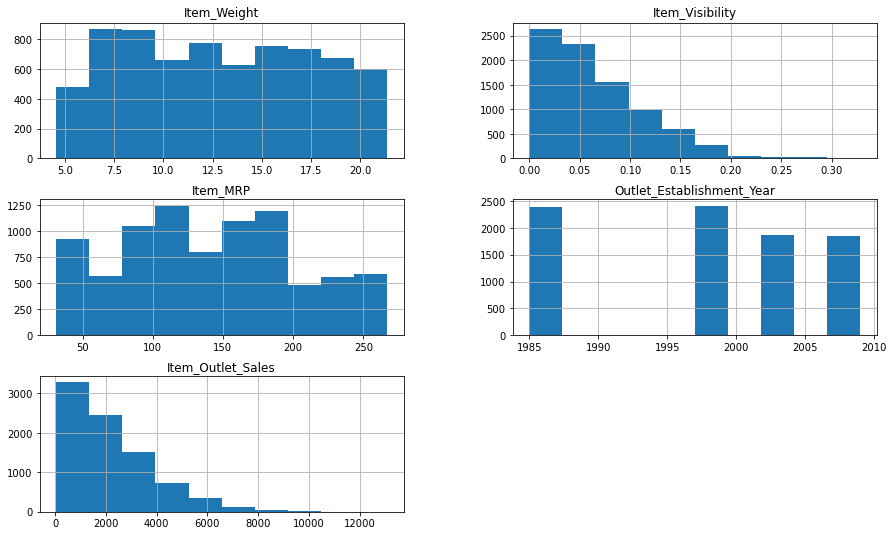

In [67]:
df.hist(figsize=(15,9))

In [69]:
#conclusion:  Item_Weight  doesnot have normal distribution
# Item_visiblity has right skewed data
# Item_Mrp  doesnt have normal distributed data
#Outlet_Extablistment_year  has discrete data
# Item_outlet_sales has right skewed data

In [70]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [71]:
df['Item_Fat_Content'].unique()  # replace misspelling

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [72]:
df.Item_Fat_Content=df.Item_Fat_Content.replace('LF','Low Fat')
df.Item_Fat_Content=df.Item_Fat_Content.replace('reg','Regular')
df.Item_Fat_Content=df.Item_Fat_Content.replace('low fat','Low Fat')

In [73]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [75]:
# we have 7 categorical columns and 5 numerical column including target variable

# Null Values()

In [81]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:>

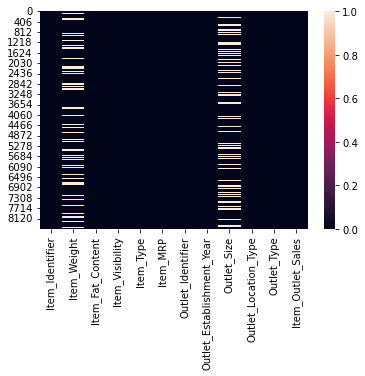

In [82]:
sns.heatmap(df.isnull())

In [78]:
# Outlet size have 2410 missing values  , 28% missing values within feature
df['Outlet_Size'].isnull().mean()

0.2827642848762173

In [85]:
#Item_weight  have 1463 missig records,   17% missing values
df['Item_Weight'].isnull().mean()

0.1716531737651062

# Correlation

<AxesSubplot:>

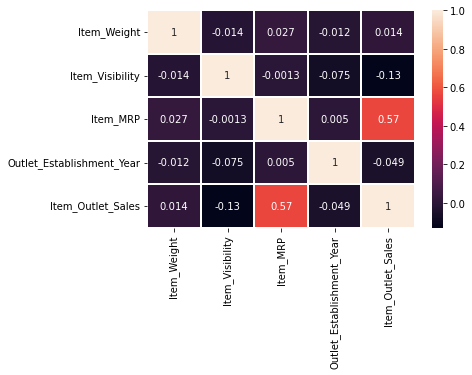

In [87]:
sns.heatmap(df.corr(),annot=True,linecolor='white',linewidths=.25)

In [89]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

# Since Item_MRP have good correlation, lets explore it

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

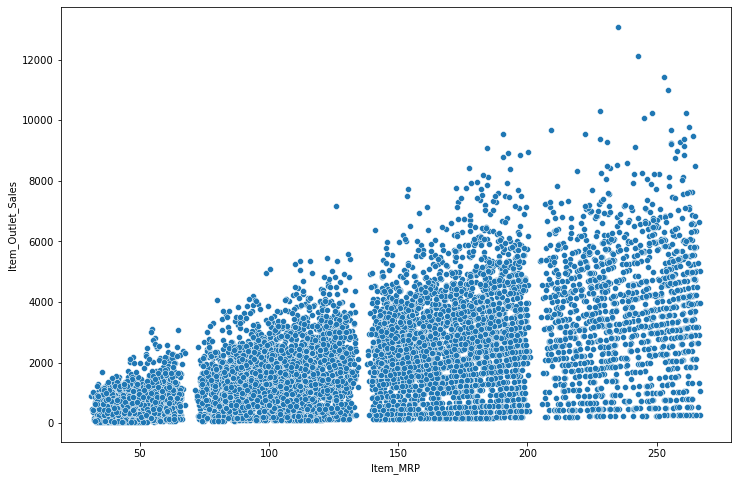

In [101]:
f,ax= plt.subplots(1,1,figsize=(12,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=df)

In [ ]:
# as MRP increases, Sales increases

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

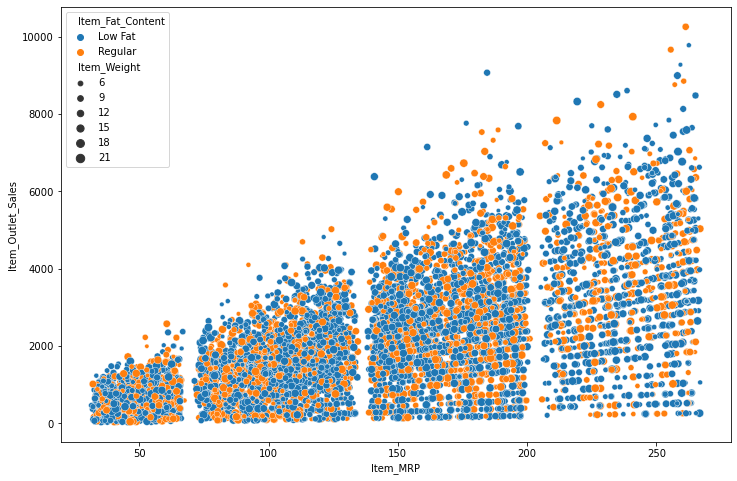

In [103]:
f,ax= plt.subplots(1,1,figsize=(12,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight',data=df)

In [ ]:
# MRP have positive correlation with sales...
#LowFat iteam has been consumed more
#

# Explore more columns

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

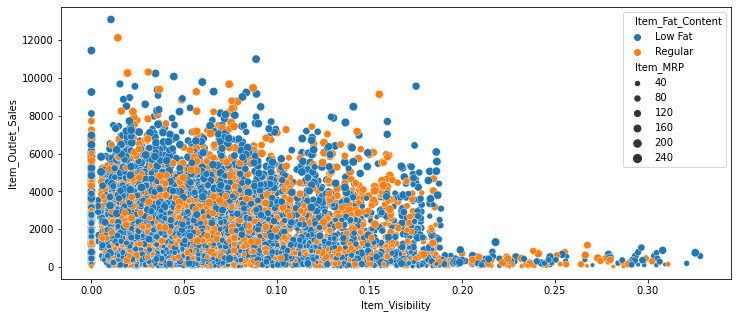

In [104]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_MRP',data=df)

In [105]:
# Visiblity doesnt have impact on sales. even if the product have more visiblity, sale is less

In [106]:
df['Item_Identifier'].nunique()  # code for item, unique 1559 items in the Mart

1559

In [107]:
df['Item_Type'].nunique()   #  item category, unique category of items in the mart

16

In [108]:
df.groupby('Item_Type')['Item_Identifier'].count()

Item_Type
Baking Goods              648
Breads                    251
Breakfast                 110
Canned                    649
Dairy                     682
Frozen Foods              856
Fruits and Vegetables    1232
Hard Drinks               214
Health and Hygiene        520
Household                 910
Meat                      425
Others                    169
Seafood                    64
Snack Foods              1200
Soft Drinks               445
Starchy Foods             148
Name: Item_Identifier, dtype: int64

In [109]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [110]:
# Main Items in Mart
label=df['Item_Type'].value_counts().index
value=df['Item_Type'].value_counts().values

([<matplotlib.patches.Wedge at 0x2779a488550>,
 [Text(0.9885134290668446, 0.4825362168319687, 'Fruits and Vegetables'),
  Text(0.24030971243089047, 1.0734296633274967, 'Snack Foods'),
  Text(-0.5819825343166728, 0.9334325523305597, 'Household'),
  Text(-1.0285786969861261, 0.3899049423979169, 'Frozen Foods'),
  Text(-1.077062377695873, -0.22346506338153288, 'Dairy'),
  Text(-0.8447302131430985, -0.7045785030805407, 'Canned'),
  Text(-0.42586341218777557, -1.0142190858782856, 'Baking Goods'),
  Text(0.03628228530275769, -1.099401471607715, 'Health and Hygiene'),
  Text(0.4168746716474865, -1.0179467118365286, 'Soft Drinks'),
  Text(0.716494856094164, -0.83464670441487, 'Meat'),
  Text(0.900194282333554, -0.6321789731191458, 'Breads'),
  Text(0.994829306903044, -0.46937687429911723, 'Hard Drinks'),
  Text(1.0509763124562066, -0.3247287955447658, 'Others'),
  Text(1.0816671190247293, -0.19999060883137015, 'Starchy Foods'),
  Text(1.0957698794777586, -0.0963761963832281, 'Breakfast'),
  Te

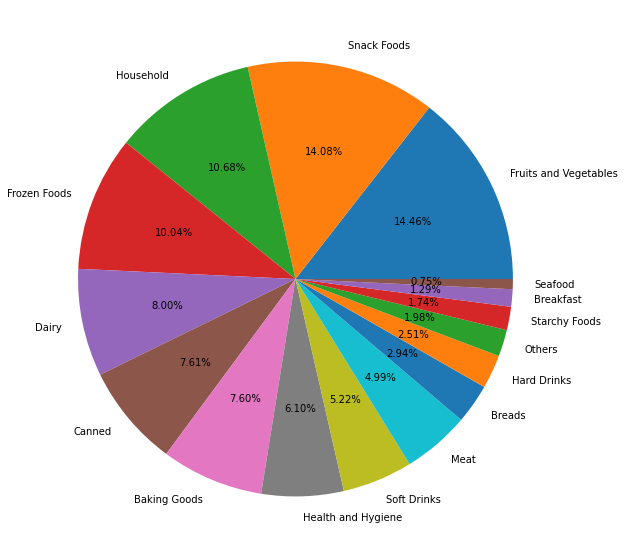

In [111]:
plt.figure(figsize=(10,10))
plt.pie(value,labels=label,autopct='%.2f%%')

In [114]:
df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean()
#Conclusion:  Low Fat and Regular have same sale revenue

Item_Fat_Content
Low Fat    2157.711534
Regular    2224.561170
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

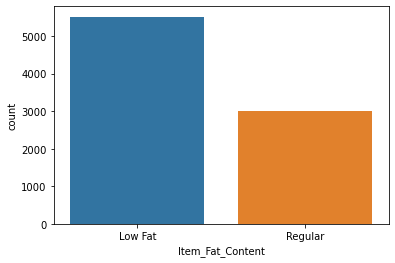

In [113]:


sns.countplot('Item_Fat_Content',data=df)

In [115]:
# conclusion: Although Low fat item has been sold more in quantity  but sale revenue of both is almost equal
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

([<matplotlib.patches.Wedge at 0x27799b63670>,
 [Text(-0.49108062250385487, 0.9842966129176847, 'Low Fat'),
  Text(0.4910806225038548, -0.9842966129176849, 'Regular')],
 [Text(-0.2678621577293753, 0.5368890615914643, '64.73%'),
  Text(0.2678621577293753, -0.5368890615914644, '35.27%')])

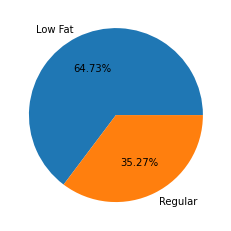

In [117]:
plt.pie(df['Item_Fat_Content'].value_counts().values,labels=df['Item_Fat_Content'].value_counts().index,autopct='%.2f%%')

In [118]:
# COnclusion:  obvious, health concious peoples like to buy low Fat items

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

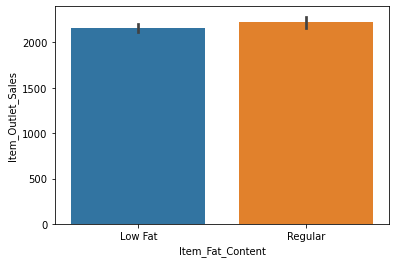

In [119]:
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales', data=df)

In [120]:
# Sales revenue of Low fat and High fat is almost same.

In [121]:
#  Item_Fat_Content     VS   Item_Visibility  in store
df.groupby('Item_Fat_Content')['Item_Visibility'].mean()

Item_Fat_Content
Low Fat    0.064330
Regular    0.069439
Name: Item_Visibility, dtype: float64

In [122]:
# Item type vs Fat content
df.groupby(['Item_Fat_Content','Item_Type']).count()

Item_Identifier  Item_Weight  \
Item_Fat_Content Item_Type                                             
Low Fat          Baking Goods                       329          262   
                 Breads                             140          113   
                 Breakfast                           41           34   
                 Canned                             341          286   
                 Dairy                              418          354   
                 Frozen Foods                       450          375   
                 Fruits and Vegetables              630          518   
                 Hard Drinks                        214          183   
                 Health and Hygiene                 520          430   
                 Household                          910          759   
                 Meat                               170          132   
                 Others                             169          137   
                 Seafood                             37           29   
                 Snack Foods                        692          565   
                 Soft Drinks                        374          315   
                 Starchy Foods                       82           74   
Regular          Baking Goods                       319          274   
                 Breads                             111           91   
                 Breakfast                           69           55   
                 Canned                             308          253   
                 Dairy                              264          212   
                 Frozen Foods                       406          343   
                 Fruits and Vegetables              602          501   
                 Meat                               255          205   
                 Seafood                             27           22   
                 Snack Foods                        508          423   
                 Soft Drinks                         71           59   
                 Starchy Foods                       66           56   

                                        Item_Visibility  Item_MRP  \
Item_Fat_Content Item_Type                                          
Low Fat          Baking Goods                       329       329   
                 Breads                             140       140   
                 Breakfast                           41        41   
                 Canned                             341       341   
                 Dairy                              418       418   
                 Frozen Foods                       450       450   
                 Fruits and Vegetables              630       630   
                 Hard Drinks                        214       214   
                 Health and Hygiene                 520       520   
                 Household                          910       910   
                 Meat                               170       170   
                 Others                             169       169   
                 Seafood                             37        37   
                 Snack Foods                        692       692   
                 Soft Drinks                        374       374   
                 Starchy Foods                       82        82   
Regular          Baking Goods                       319       319   
                 Breads                             111       111   
                 Breakfast                           69        69   
                 Canned                             308       308   
                 Dairy                              264       264   
                 Frozen Foods                       406       406   
                 Fruits and Vegetables              602       602   
                 Meat                               255       255   
                 Seafood                             27        27   
                

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

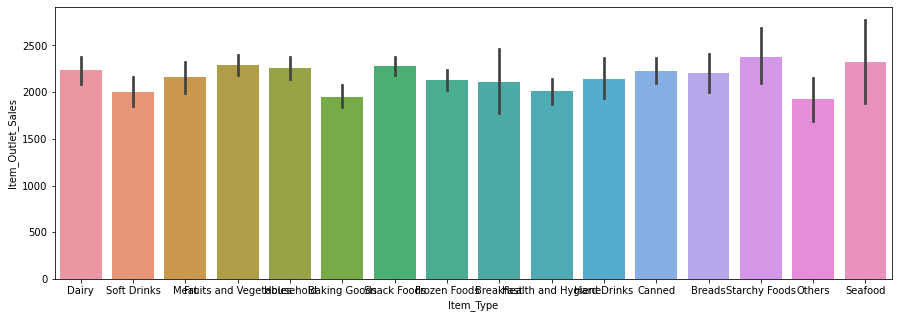

In [123]:
plt.figure(figsize=(15,5))
sns.barplot(x='Item_Type',y='Item_Outlet_Sales', data=df)

In [124]:
df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)

Item_Type
Starchy Foods            2374.332773
Seafood                  2326.065928
Fruits and Vegetables    2289.009592
Snack Foods              2277.321739
Household                2258.784300
Dairy                    2232.542597
Canned                   2225.194904
Breads                   2204.132226
Meat                     2158.977911
Hard Drinks              2139.221622
Frozen Foods             2132.867744
Breakfast                2111.808651
Health and Hygiene       2010.000265
Soft Drinks              2006.511735
Baking Goods             1952.971207
Others                   1926.139702
Name: Item_Outlet_Sales, dtype: float64

In [125]:
# Items types who sold more Starchy food, seafood, Fruits $ vegitables, snacks foods
# household

In [126]:
df['Outlet_Identifier'].nunique()

10

In [127]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [128]:
# We have total 10 store, with different code

In [129]:
df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().sort_values(ascending=False)

Outlet_Identifier
OUT027    3694.038558
OUT035    2438.841866
OUT049    2348.354635
OUT017    2340.675263
OUT013    2298.995256
OUT046    2277.844267
OUT045    2192.384798
OUT018    1995.498739
OUT019     340.329723
OUT010     339.351662
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

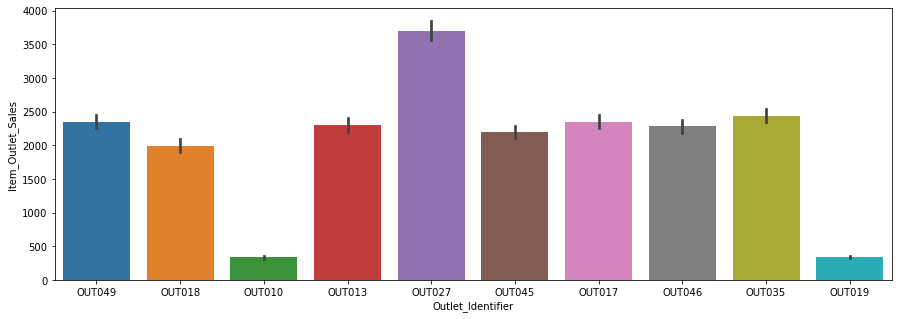

In [130]:
plt.figure(figsize=(15,5))
sns.barplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=df)

# Oulet size

In [131]:
df['Outlet_Size'].nunique()

3

In [132]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [133]:
df['Outlet_Size'].isnull().sum()

2410

In [134]:
df.shape

(8523, 12)

In [135]:
df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean()

Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

In [136]:
# From available data, Mediam size store have high sale, then High size and then small size outlet

In [137]:
df['Outlet_Size'].value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [138]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# outlet size vs sales

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

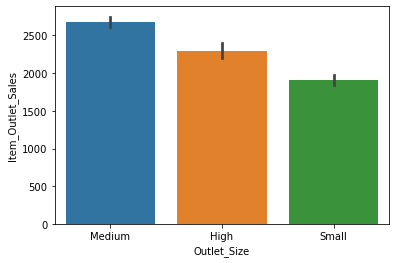

In [139]:
# does outlet size have any relation with total sales.
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df)

In [140]:
# Medium size outlets are making more sales

# location type  vs sales

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

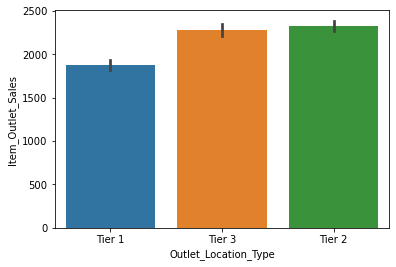

In [141]:
# does outlet location have any relation with total sales.
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df)

In [142]:
# Tier 2 and Tier 3 location have more slaes/ seems middle class family area, where large families are living having more requirements

# outlet type vs sales

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

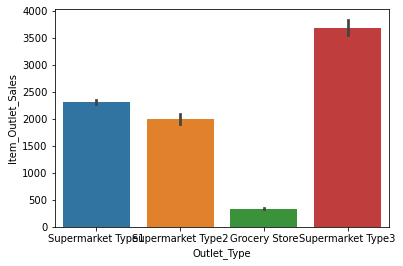

In [143]:
# does outlet type have any relation with total sales.
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df)

In [144]:
# Supermarket type 3 have more sale, size is Medium
# Grocery are small in size, have less sales

# outlet establisy yr vs sales

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

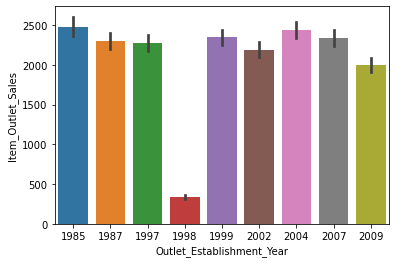

In [145]:
# does year establishment have effect on sales

sns.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=df)

In [146]:
# Not a big effect, although store establish in 1998 are not doing sales good enough

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

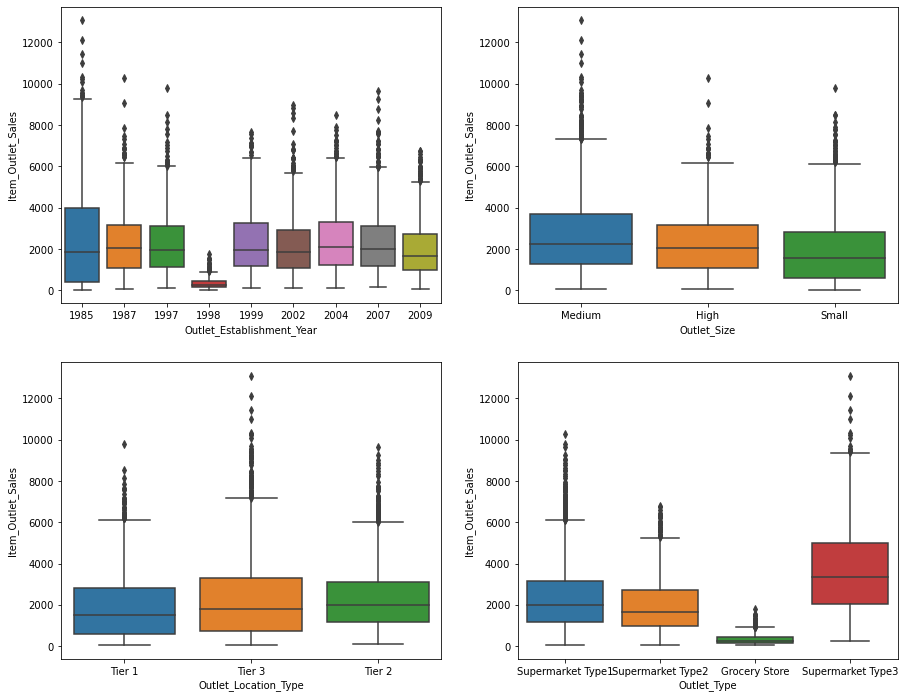

In [147]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',ax=axes[0,0],data=df)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',ax=axes[0,1],data=df)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',ax=axes[1,0],data=df)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',ax=axes[1,1],data=df)

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

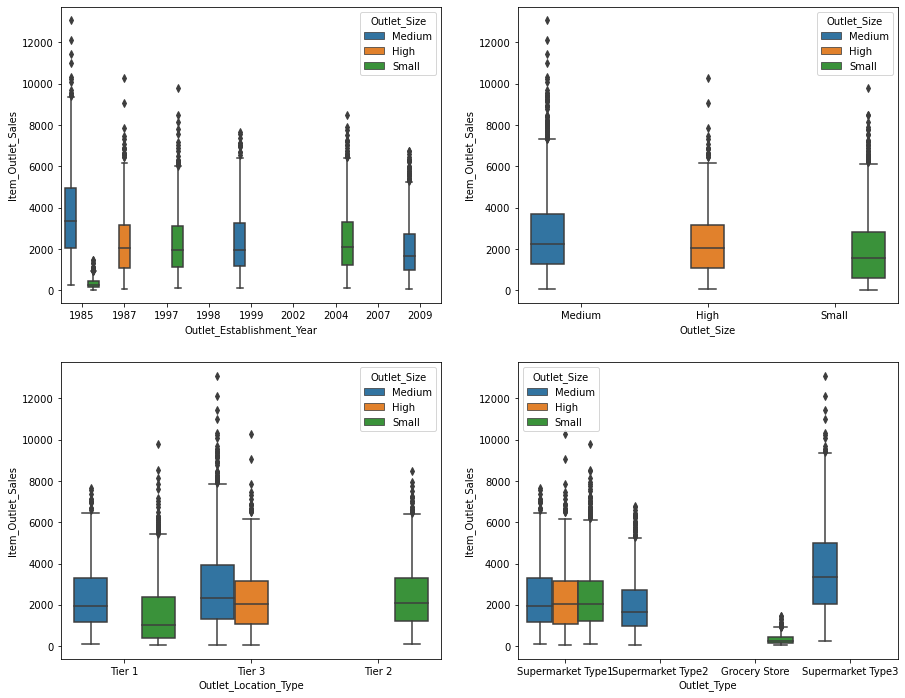

In [148]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[0,0],data=df)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[0,1],data=df)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[1,0],data=df)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[1,1],data=df)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [150]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [151]:
df['Outlet_Size'].mode()

0    Medium
dtype: object

In [152]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [153]:
df['Outlet_Size'].fillna('Medium', inplace=True)

In [154]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [155]:
df['Item_Weight'].median()

12.6

In [156]:
df['Item_Weight'].fillna(df['Item_Weight'].median(),inplace=True)

In [157]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [158]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [159]:
df['Item_Identifier'].nunique()

1559

In [160]:
# MEAN Encoding for Item Identifier

mean_encode=df.groupby('Item_Identifier')['Item_Outlet_Sales'].mean().to_dict()

In [161]:
df['Item_Identifier']= df['Item_Identifier'].map(mean_encode)

In [162]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,5198.067050,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,862.211000,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,1478.076000,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3021.067500,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,653.926567,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   float64
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 799.2+ KB


In [164]:
num=df.select_dtypes(np.number)

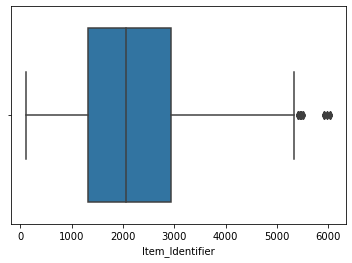

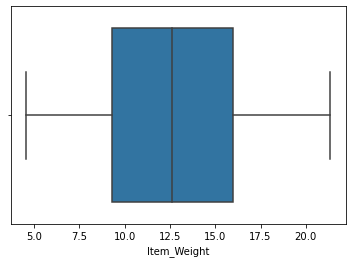

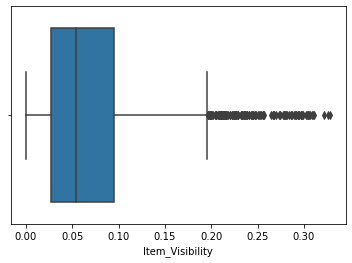

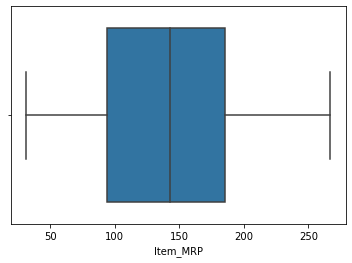

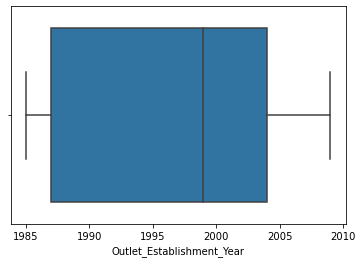

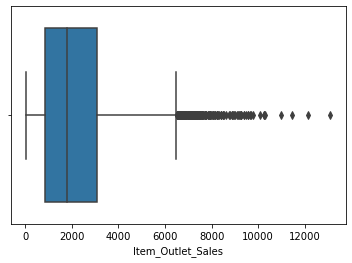

In [165]:
for i in num:
    sns.boxplot(df[i])
    plt.show()

In [166]:
IQR= df['Item_Visibility'].quantile(.75)-df['Item_Visibility'].quantile(.25)
IQR

0.067595815

In [167]:
upper= df['Item_Visibility'].quantile(.75) +( 1.5 * IQR)
upper

0.195979015

In [168]:
df['Item_Visibility']=np.where(df['Item_Visibility']>upper,upper,df['Item_Visibility'])

# Missing and outlier handle

In [169]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,5198.067050,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,862.211000,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,1478.076000,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3021.067500,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,653.926567,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [170]:
# MEan encoding for Item_Type  and Outlet_Identifier

In [171]:
d=df['Item_Type'].value_counts().to_dict()

In [172]:
df['Item_Type']=  df['Item_Type'].map(d)

In [173]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,5198.067050,9.30,Low Fat,0.016047,682,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,862.211000,5.92,Regular,0.019278,445,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,1478.076000,17.50,Low Fat,0.016760,425,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3021.067500,19.20,Regular,0.000000,1232,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,653.926567,8.93,Low Fat,0.000000,910,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [174]:
c=df['Outlet_Identifier'].value_counts().to_dict()

In [175]:
df['Outlet_Identifier']=  df['Outlet_Identifier'].map(c)

In [176]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,5198.067050,9.30,Low Fat,0.016047,682,249.8092,930,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,862.211000,5.92,Regular,0.019278,445,48.2692,928,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,1478.076000,17.50,Low Fat,0.016760,425,141.6180,930,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3021.067500,19.20,Regular,0.000000,1232,182.0950,555,1998,Medium,Tier 3,Grocery Store,732.3800
4,653.926567,8.93,Low Fat,0.000000,910,53.8614,932,1987,High,Tier 3,Supermarket Type1,994.7052


In [177]:
df['Outlet_Size']=df[['Outlet_Size']].replace({'Medium':1,'Small':0,'High':2})

In [178]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,5198.067050,9.30,Low Fat,0.016047,682,249.8092,930,1999,1,Tier 1,Supermarket Type1,3735.1380
1,862.211000,5.92,Regular,0.019278,445,48.2692,928,2009,1,Tier 3,Supermarket Type2,443.4228
2,1478.076000,17.50,Low Fat,0.016760,425,141.6180,930,1999,1,Tier 1,Supermarket Type1,2097.2700
3,3021.067500,19.20,Regular,0.000000,1232,182.0950,555,1998,1,Tier 3,Grocery Store,732.3800
4,653.926567,8.93,Low Fat,0.000000,910,53.8614,932,1987,2,Tier 3,Supermarket Type1,994.7052


In [179]:
data=pd.get_dummies(df, drop_first=True)

In [180]:
data

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,5198.067050,9.300,0.016047,682,249.8092,930,1999,1,3735.1380,0,0,0,1,0,0
1,862.211000,5.920,0.019278,445,48.2692,928,2009,1,443.4228,1,0,1,0,1,0
2,1478.076000,17.500,0.016760,425,141.6180,930,1999,1,2097.2700,0,0,0,1,0,0
3,3021.067500,19.200,0.000000,1232,182.0950,555,1998,1,732.3800,1,0,1,0,0,0
4,653.926567,8.930,0.000000,910,53.8614,932,1987,2,994.7052,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,3232.542225,6.865,0.056783,1200,214.5218,932,1987,2,2778.3834,0,0,1,1,0,0
8519,2636.568000,8.380,0.046982,648,108.1570,929,2002,1,549.2850,1,1,0,1,0,0
8520,1221.521067,10.600,0.035186,520,85.1224,930,2004,0,1193.1136,0,1,0,1,0,0
8521,2067.752867,7.210,0.145221,1200,103.1332,928,2009,1,1845.5976,1,0,1,0,1,0


In [181]:
df.skew()

Item_Identifier              0.505800
Item_Weight                  0.121845
Item_Visibility              0.813980
Item_Type                   -0.154209
Item_MRP                     0.127202
Outlet_Identifier           -2.244651
Outlet_Establishment_Year   -0.396641
Outlet_Size                  0.087072
Item_Outlet_Sales            1.177531
dtype: float64

In [182]:
X= data.drop('Item_Outlet_Sales',axis=1)
Y=data['Item_Outlet_Sales']

In [183]:
X

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,5198.067050,9.300,0.016047,682,249.8092,930,1999,1,0,0,0,1,0,0
1,862.211000,5.920,0.019278,445,48.2692,928,2009,1,1,0,1,0,1,0
2,1478.076000,17.500,0.016760,425,141.6180,930,1999,1,0,0,0,1,0,0
3,3021.067500,19.200,0.000000,1232,182.0950,555,1998,1,1,0,1,0,0,0
4,653.926567,8.930,0.000000,910,53.8614,932,1987,2,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,3232.542225,6.865,0.056783,1200,214.5218,932,1987,2,0,0,1,1,0,0
8519,2636.568000,8.380,0.046982,648,108.1570,929,2002,1,1,1,0,1,0,0
8520,1221.521067,10.600,0.035186,520,85.1224,930,2004,0,0,1,0,1,0,0
8521,2067.752867,7.210,0.145221,1200,103.1332,928,2009,1,1,0,1,0,1,0


In [184]:
from sklearn.preprocessing import power_transform
X_transformed=power_transform(X)

In [185]:
pd.DataFrame(X_transformed).skew()

0    -0.067576
1    -0.062510
2     0.121515
3    -0.197662
4    -0.115386
5    -2.186382
6    -0.200959
7    -0.073203
8     0.616705
9     0.738834
10    0.437995
11   -0.649203
12    2.511707
13    2.498184
dtype: float64

In [186]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X_scaled=mms.fit_transform(X_transformed)

# MAchime learning

In [187]:
# Its a Regression problem coz output variable have continuous data, sales prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

LR= LinearRegression()

In [188]:
# Train Test Split / finding best random_state for my model

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(X_scaled,Y,random_state=i,test_size=.3)
    LR.fit(x_train,y_train)
    train_pred=LR.predict(x_train)
    test_pred=LR.predict(x_test)
    if round(r2_score(y_test,test_pred),3)==round(r2_score(y_train,train_pred),3):
        print("At random state ", i, "The model performance very well")
        print("At random state: ",i)
        print("Test R2 score is: ", round(r2_score(y_test,test_pred),2))
        print('Train R2 score is: ', round(r2_score(y_train,train_pred),2))
        print('X'*50,'\n')

At random state  13 The model performance very well
At random state:  13
Test R2 score is:  0.61
Train R2 score is:  0.61
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  46 The model performance very well
At random state:  46
Test R2 score is:  0.61
Train R2 score is:  0.61
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  48 The model performance very well
At random state:  48
Test R2 score is:  0.61
Train R2 score is:  0.61
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  81 The model performance very well
At random state:  81
Test R2 score is:  0.61
Train R2 score is:  0.61
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  115 The model performance very well
At random state:  115
Test R2 score is:  0.61
Train R2 score is:  0.61
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  131 The model performance very well
At random state:  131
Test R2 score is:  0.61
Train R2 score is:  0.61

In [189]:
# Lets take random state 43

x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=48,test_size=.3)
LR.fit(x_train,y_train)

LinearRegression()

In [190]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [191]:
LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()
XGB_model= XGBRegressor()
Elastic_model= ElasticNet()
SGH_model= SGDRegressor()
Bag_model=BaggingRegressor()
ADA_model=AdaBoostRegressor()
GB_model= GradientBoostingRegressor()

model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,Elastic_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [192]:
for m in model:
    m.fit(x_train,y_train)
    print('mean_absolute_error of ',m ,'model', mean_absolute_error(y_test,m.predict(x_test)))
    print('mean_square_error of',m,'model' , mean_squared_error(y_test,m.predict(x_test)))
    print('R2 Score of',m,'model', r2_score(y_test,m.predict(x_test) )*100)
    print('X' * 50, '\n\n')

mean_absolute_error of  LinearRegression() model 795.3299994942769
mean_square_error of LinearRegression() model 1162187.8421061488
R2 Score of LinearRegression() model 62.80822361541753
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  Ridge() model 794.999592407753
mean_square_error of Ridge() model 1163680.0754842304
R2 Score of Ridge() model 62.760469880521605
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  Lasso() model 794.9797519759776
mean_square_error of Lasso() model 1163895.1870890942
R2 Score of Lasso() model 62.75358598239775
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  DecisionTreeRegressor() model 1030.9445612045365
mean_square_error of DecisionTreeRegressor() model 2184430.800305686
R2 Score of DecisionTreeRegressor() model 30.094896101018374
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  SVR() model 1155.9343735656591
mean_square_error of SVR() mode

# Cross Validation

In [193]:
from sklearn.model_selection import cross_val_score

In [194]:
for i in model:
    print('mean_square of ',i, 'model',mean_squared_error(y_test,i.predict(x_test)))
    print("cross Validation score of ",i ," is ",cross_val_score(i,X,Y,cv=10, scoring='neg_mean_squared_error').mean())
    print('*'*50)

mean_square of  LinearRegression() model 1162187.8421061488
cross Validation score of  LinearRegression()  is  -1095589.5870461478
**************************************************
mean_square of  Ridge() model 1163680.0754842304
cross Validation score of  Ridge()  is  -1096997.876770991
**************************************************
mean_square of  Lasso() model 1163895.1870890942
cross Validation score of  Lasso()  is  -1096679.356374643
**************************************************
mean_square of  DecisionTreeRegressor() model 2184430.800305686
cross Validation score of  DecisionTreeRegressor()  is  -2162980.6415141597
**************************************************
mean_square of  SVR() model 2492803.676928486
cross Validation score of  SVR()  is  -2186090.8014032925
**************************************************
mean_square of  KNeighborsRegressor() model 1584207.6812141878
cross Validation score of  KNeighborsRegressor()  is  -1559879.7740761514
*****************

In [61]:
for i in model:
    print('Root mean_square of ',i, 'model',np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
    score=cross_val_score(i,X,Y,cv=10, scoring='neg_mean_squared_error').mean()
    print("cross Validation score of root mean square ",i ," is ",np.sqrt(-score))
    print('*'*50)

Root mean_square of  LinearRegression() model 1078.1773714458575
cross Validation score of root mean square  LinearRegression()  is  1046.7676711040126
**************************************************
Root mean_square of  Ridge() model 1078.825565745916
cross Validation score of root mean square  Ridge()  is  1047.4368309134436
**************************************************
Root mean_square of  Lasso() model 1078.7895009055733
cross Validation score of root mean square  Lasso()  is  1047.3241437447375
**************************************************
Root mean_square of  DecisionTreeRegressor() model 1481.472762638162
cross Validation score of root mean square  DecisionTreeRegressor()  is  1479.1114007975461
**************************************************
Root mean_square of  SVR() model 1583.2782222574765
cross Validation score of root mean square  SVR()  is  1482.0355619728448
**************************************************
Root mean_square of  KNeighborsRegressor() mode

# Square Root mean_square (SRME) of  GradientBoostingRegressor() model 1034.582330775297
cross Validation score of RMSE  GradientBoostingRegressor()  is  1001.7932643272118

In [62]:
# Gradient Boosting Regressor has least SMSE  and smallest difference with CV

# Lets do Hypertune this

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
param=[{'n_estimators': [100,200,400,600],
       'learning_rate':[.01,.03,.07,.09,.1,.2,.5,.9],
        'max_depth': [10, 64, 118, 173, 227],
        'min_samples_split': [1,2,3,5,9,13],
        'max_features': ['auto','sqrt','log2']
       }]

In [ ]:
GS=GridSearchCV(GB_model,param,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
#GS.fit(x_train,y_train)   This took many hours to complete, so saved the data

In [195]:
GS.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:
GS.best_params_

{'learning_rate': 0.03,
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_split': 9,
 'n_estimators': 100}

In [ ]:
GS_predict=GS.best_estimator_.predict(x_test)

In [ ]:
print('Root mean_square of Hypertuned model is ',np.sqrt(mean_squared_error(y_test,GS_predict)))

Root mean_square of Hypertuned model is  1064.0530620283198


# Save the Model

In [207]:
import joblib

In [208]:
joblib.dump(   GB_model ,'Big-Data-Mart-Sales-Problem.pkl')

['Big-Data-Mart-Sales-Problem.pkl']

# Adaboost

In [201]:
from sklearn.model_selection import RandomizedSearchCV

In [202]:
param=[{'n_estimators': [100,150,200],
       'learning_rate':[.001,.003,.07,.09,.1],
        'algorithm': ['SAMME','SAMME.R'],
        
       }]

In [204]:
GS_ada=GridSearchCV(ADA_model,param,cv=10,scoring='neg_mean_squared_errn_jobs=',n_jobs=-1)
#GS.fit(x_train,y_train)  # this took 5 hrs, so i have to intrupt inbetween

# I have raised the ticket for this but no help provided. These Hypertuning taking many many hours. whats wrong with this?

# Ignoring Hypertuning as of now. COntinuew with Gradient boosting model

In [212]:
import pickle
loaded_model=pickle.load(open('Big-Data-Mart-Sales-Problem.pkl','rb'))


# Import Test data

In [235]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')

In [236]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [237]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [238]:
#Handle Missing values

df['Item_Weight'].fillna(df['Item_Weight'].median(),inplace=True)


In [239]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [240]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

In [241]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [242]:
df['Outlet_Size'].fillna('Medium', inplace=True)

In [243]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [244]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.500,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [245]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [246]:
df.Item_Fat_Content=df.Item_Fat_Content.replace('LF','Low Fat')
df.Item_Fat_Content=df.Item_Fat_Content.replace('reg','Regular')
df.Item_Fat_Content=df.Item_Fat_Content.replace('low fat','Low Fat')

In [247]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [250]:
# Outlier handle
IQR= df['Item_Visibility'].quantile(.75)-df['Item_Visibility'].quantile(.25)
IQR

0.066415748

In [251]:
upper= df['Item_Visibility'].quantile(.75) +( 1.5 * IQR)
upper

0.193086245

In [252]:
df['Item_Visibility']=np.where(df['Item_Visibility']>upper,upper,df['Item_Visibility'])

In [253]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.500,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [255]:
# MEAN Encoding for Item Identifier

df['Item_Identifier']= df['Item_Identifier'].map(mean_encode)

In [256]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1693.795200,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,1453.663333,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,4470.580680,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,1658.951667,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,3448.844000,12.500,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [257]:
#d=df['Item_Type'].value_counts().to_dict()
df['Item_Type']=  df['Item_Type'].map(df['Item_Type'].value_counts().to_dict())

In [259]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1693.795200,20.750,Low Fat,0.007565,789,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,1453.663333,8.300,Regular,0.038428,454,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,4470.580680,14.600,Low Fat,0.099575,111,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,1658.951667,7.315,Low Fat,0.015388,789,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,3448.844000,12.500,Regular,0.118599,454,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [260]:

df['Outlet_Identifier']=  df['Outlet_Identifier'].map(df['Outlet_Identifier'].value_counts().to_dict())

In [261]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1693.795200,20.750,Low Fat,0.007565,789,107.8622,620,1999,Medium,Tier 1,Supermarket Type1
1,1453.663333,8.300,Regular,0.038428,454,87.3198,617,2007,Medium,Tier 2,Supermarket Type1
2,4470.580680,14.600,Low Fat,0.099575,111,241.7538,370,1998,Medium,Tier 3,Grocery Store
3,1658.951667,7.315,Low Fat,0.015388,789,155.0340,617,2007,Medium,Tier 2,Supermarket Type1
4,3448.844000,12.500,Regular,0.118599,454,234.2300,624,1985,Medium,Tier 3,Supermarket Type3


In [262]:
df['Outlet_Size']=df[['Outlet_Size']].replace({'Medium':1,'Small':0,'High':2})

In [263]:
data=pd.get_dummies(df, drop_first=True)

In [264]:
data

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1693.795200,20.750,0.007565,789,107.8622,620,1999,1,0,0,0,1,0,0
1,1453.663333,8.300,0.038428,454,87.3198,617,2007,1,1,1,0,1,0,0
2,4470.580680,14.600,0.099575,111,241.7538,370,1998,1,0,0,1,0,0,0
3,1658.951667,7.315,0.015388,789,155.0340,617,2007,1,0,1,0,1,0,0
4,3448.844000,12.500,0.118599,454,234.2300,624,1985,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,2248.787057,10.500,0.013496,789,141.3154,620,1997,0,1,0,0,1,0,0
5677,3210.043733,7.600,0.142991,121,169.1448,618,2009,1,1,0,1,0,1,0
5678,2054.468571,10.000,0.073529,338,118.7440,619,2002,1,0,1,0,1,0,0
5679,2778.383400,15.300,0.000000,435,214.6218,617,2007,1,1,1,0,1,0,0


In [265]:
from sklearn.preprocessing import power_transform
X_transformed=power_transform(data)

In [266]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X_scaled=mms.fit_transform(X_transformed)

In [267]:
X_scaled

array([[0.47175251, 0.97151045, 0.07760342, ..., 1.        , 0.        ,
        0.        ],
       [0.42671146, 0.27850297, 0.34514562, ..., 1.        , 0.        ,
        0.        ],
       [0.84585925, 0.65827375, 0.70432111, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.53338486, 0.38923572, 0.57363459, ..., 1.        , 0.        ,
        0.        ],
       [0.64152953, 0.69619089, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.53965784, 0.35743871, 0.72696551, ..., 1.        , 0.        ,
        0.        ]])

In [268]:
import pickle
loaded_model=pickle.load(open('Big-Data-Mart-Sales-Problem.pkl','rb'))

In [ ]:
loaded_model.score()